In [1]:
import os
import urllib.request
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.manifold import TSNE
import numpy as np

In **glove.6B.200d** each line of the text file contains a word, followed by N numbers. The N numbers describe the vector of the word’s position. N may vary depending on which vectors you downloaded

In [4]:
# use it load it in the start
#!unzip "/content/drive/MyDrive/glove.6B.zip" -d "/content/"

Archive:  /content/drive/MyDrive/glove.6B.zip
  inflating: /content/glove.6B.50d.txt  
  inflating: /content/glove.6B.100d.txt  
  inflating: /content/glove.6B.200d.txt  
  inflating: /content/glove.6B.300d.txt  


In [5]:
emmbed_dict = {}
with open('/content/glove.6B.200d.txt','r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:],'float32')
    emmbed_dict[word]=vector

In [6]:
len(emmbed_dict)

400000

In [11]:
print(emmbed_dict["king"])

[-0.49346   -0.14768    0.32166    0.056899   0.052572   0.20192
 -0.13506   -0.030793   0.15614   -0.23004   -0.66376   -0.27316
  0.10391    0.57334   -0.032355  -0.32766   -0.2716     0.32919
  0.41305   -0.18085    1.5167     2.1649    -0.10278    0.098019
 -0.018946   0.027292  -0.7948     0.36631   -0.33151    0.2884
  0.10436   -0.19166    0.27326   -0.17519   -0.14986   -0.072333
 -0.54371   -0.29728    0.081491  -0.42673   -0.36406   -0.52035
  0.18455    0.44121   -0.32196    0.39172    0.11952    0.36979
  0.29229   -0.42954    0.46653   -0.067243   0.31216   -0.17216
  0.48874    0.2803    -0.17577   -0.35101    0.020792   0.15974
  0.21927   -0.32499    0.086022   0.38927   -0.65638   -0.67401
 -0.41896    1.2709     0.20857    0.28315    0.58238   -0.14944
  0.3989     0.52681    0.35714   -0.39101   -0.55372   -0.56642
 -0.15762   -0.48004    0.40448    0.057518  -1.0157     0.21755
  0.073296   0.15237   -0.38362   -0.75308   -0.0060254 -0.26232
 -0.54102   -0.34347    

**Finding Closest Vectors**

Lambda function that takes a word as input and returns the distance between that word’s embedding and the embedding we gave the function. I've used euclidean distance to measure how far apart the two embeddings are.


Now if we want to rank all words by closeness to a given word, let’s say “king,” we can use:

```
find_closest_embeddings(embeddings_dict["king"])
```

In [8]:
def find_closest_embeddings(embedding):
    return sorted(emmbed_dict.keys(), key=lambda word: spatial.distance.euclidean(emmbed_dict[word], embedding))

In [10]:
print(find_closest_embeddings(emmbed_dict["king"])[1:6])

['prince', 'queen', 'monarch', 'kingdom', 'reign']


**Math with words**

In [12]:
print(find_closest_embeddings(
    emmbed_dict["twig"] - emmbed_dict["branch"] + emmbed_dict["hand"]
)[:5])

['twig', 'hand', 'cupping', 'paddles', 'caressing']


**Visualizing the Vectors**

To visualize the vectors, we are first going to be using a method known as t-distributed stochastic neighbor embedding, also known as **t-SNE**. **t-SNE** will allow us to reduce the, in my case, **50 dimensions of the data, down to 2 dimensions**. After we do that, it’s as simple as using a matplotlib scatter plot to plot it. If you would like to learn more about **t-SNE**, there are a few articles linked at the end.

In [13]:
tsne = TSNE(n_components=2, random_state=0)

- *n_components* specifies the number of dimensions to reduce the data into.
- *random_state* is a seed we can use to obtain consistent results.

In [14]:
words =  list(emmbed_dict.keys())
vectors = [emmbed_dict[word] for word in words]

After getting all the words we want to use and their corresponding vectors, we now need to fit the t-SNE class on our vectors.
We can do this using:

In [15]:
Y = tsne.fit_transform(vectors[:1000])

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


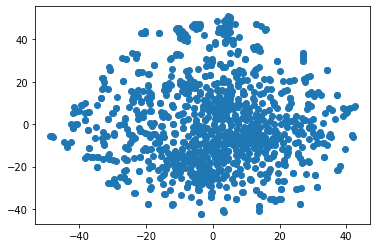

In [16]:
plt.scatter(Y[:, 0], Y[:, 1])

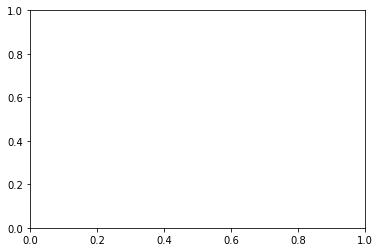

In [18]:
for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")

plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


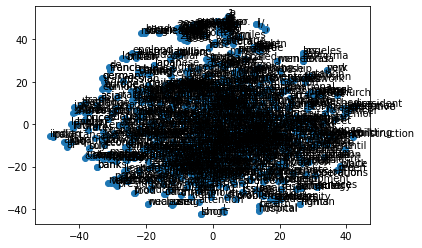

In [20]:
tsne = TSNE(n_components=2, random_state=0)
words =  list(emmbed_dict.keys())
vectors = [emmbed_dict[word] for word in words]
Y = tsne.fit_transform(vectors[:1000])
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

**With 250 words**

/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


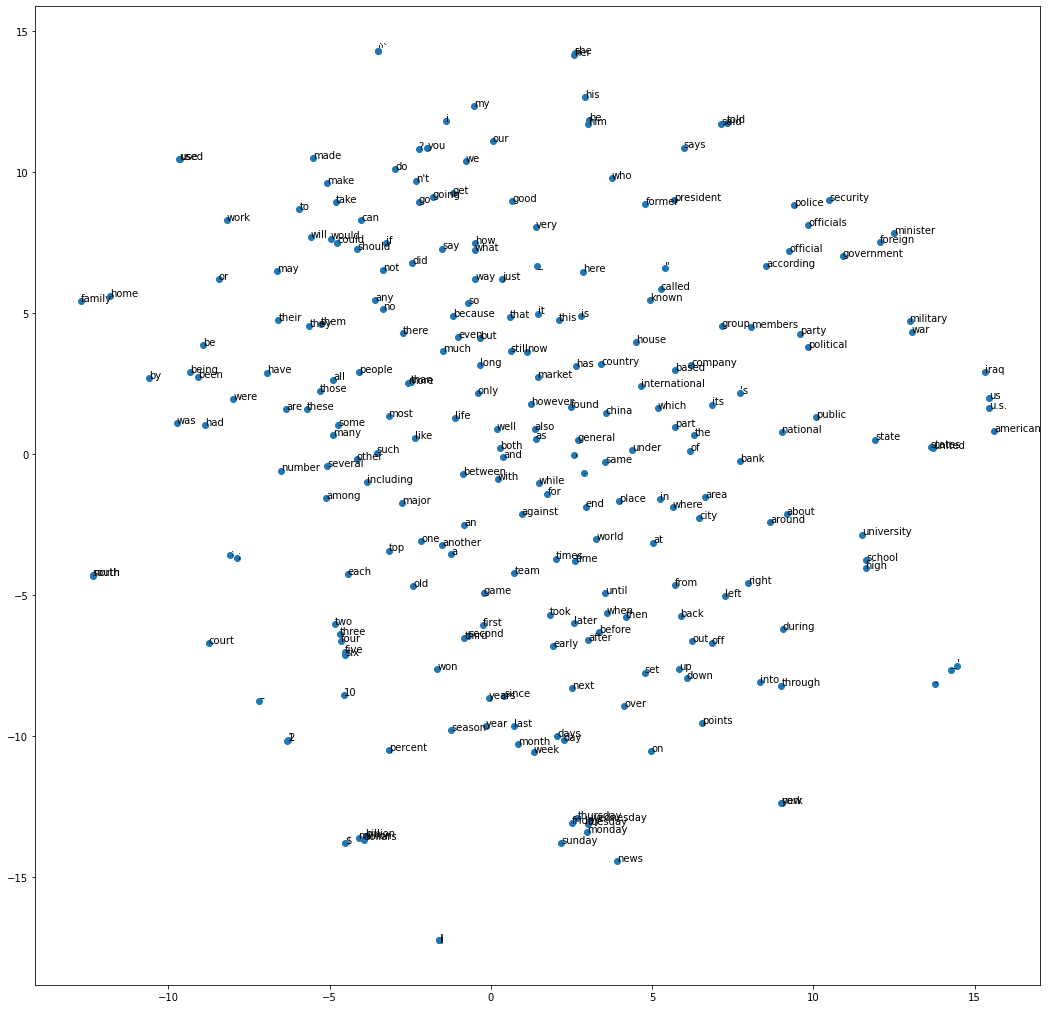

In [22]:
tsne = TSNE(n_components=2, random_state=0)
words =  list(emmbed_dict.keys())
vectors = [emmbed_dict[word] for word in words]
Y = tsne.fit_transform(vectors[:250])

fig = plt.figure(figsize=(18, 18))
plt.scatter(Y[:, 0], Y[:, 1])

for label, x, y in zip(words, Y[:, 0], Y[:, 1]):
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords="offset points")
plt.show()

In the above graph you can clearly see the correlation.

- America, U.S, Iraq(this will get me in trouble :p)

- All the weekdays are together, Mon, Tue, Wed, Thu, etc.